In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import os 
import numpy as np
import re

## Figure 4

## Heatmaps: humidity swing vs temperature

### 30 RH

In [7]:
import os

number_of_steps = 100
values = {}
values['min_time'] = 1
values['step'] = 1
t_ads_range = np.linspace(float(values['min_time']), float(values['min_time']) + (number_of_steps)*float(values['step']), num=number_of_steps, endpoint=False)
t_des_range = np.linspace(float(values['min_time']), float(values['min_time']) + (number_of_steps)*float(values['step']), num=number_of_steps, endpoint=False)




path = 'kinetics_fitting/27C/'

filelist = ['Heatmap_Syloid_ads1.0-100.0_des1.0-100.0_n100_30RH.csv',
            'Heatmap_ROS-039_ads1.0-100.0_des1.0-100.0_n100_30RH.csv', 
            'Heatmap_MIL-160_ads1.0-100.0_des1.0-100.0_n100_30RH.csv', 
            'Heatmap_ROS-037_ads1.0-100.0_des1.0-100.0_n100_30RH.csv',
            'Heatmap_MOF-303_ads1.0-100.0_des1.0-100.0_n100_30RH.csv',
            'Heatmap_ROS-040_ads1.0-100.0_des1.0-100.0_n100_30RH.csv', 
            'Heatmap_CAU-10_ads1.0-100.0_des1.0-100.0_n100_30RH.csv',
            ]

heatmap_list = [[], []]

for filename in filelist:
    print(filename)
    working_capacity_per_time_array = np.loadtxt( path + filename,  delimiter=',')
    heatmap_list[0].append(working_capacity_per_time_array)


number_of_steps = 50
values = {}
values['min_time'] = 1
values['step'] = 1
t_ads_range = np.linspace(float(values['min_time']), float(values['min_time']) + (number_of_steps)*float(values['step']), num=number_of_steps, endpoint=False)
t_des_range = np.linspace(float(values['min_time']), float(values['min_time']) + (number_of_steps)*float(values['step']), num=number_of_steps, endpoint=False)


path = 'kinetics_fitting/60C/'

filelist = ['Heatmap_Syloid_ads1.0-50.0_des1.0-50.0_n50_5.4-30RH.csv',
            'Heatmap_ROS-039_ads1.0-50.0_des1.0-50.0_n50_5.4-30RH.csv',
            'Heatmap_MIL-160_ads1.0-50.0_des1.0-50.0_n50_5.4-30RH.csv',
            'Heatmap_ROS-037_ads1.0-50.0_des1.0-50.0_n50_5.4-30RH.csv',
            'Heatmap_MOF-303_ads1.0-50.0_des1.0-50.0_n50_5.4-30RH.csv', 
            'Heatmap_ROS-040_ads1.0-50.0_des1.0-50.0_n50_5.4-30RH.csv',
            'Heatmap_CAU-10_ads1.0-50.0_des1.0-50.0_n50_5.4-30RH.csv', 
            ]


for filename in filelist:
    print(filename)
    working_capacity_per_time_array = np.loadtxt( path + filename,  delimiter=',')
    heatmap_list[1].append(working_capacity_per_time_array)

Heatmap_Syloid_ads1.0-100.0_des1.0-100.0_n100_30RH.csv
Heatmap_ROS-039_ads1.0-100.0_des1.0-100.0_n100_30RH.csv
Heatmap_MIL-160_ads1.0-100.0_des1.0-100.0_n100_30RH.csv
Heatmap_ROS-037_ads1.0-100.0_des1.0-100.0_n100_30RH.csv
Heatmap_MOF-303_ads1.0-100.0_des1.0-100.0_n100_30RH.csv
Heatmap_ROS-040_ads1.0-100.0_des1.0-100.0_n100_30RH.csv
Heatmap_CAU-10_ads1.0-100.0_des1.0-100.0_n100_30RH.csv
Heatmap_Syloid_ads1.0-50.0_des1.0-50.0_n50_5.4-30RH.csv
Heatmap_ROS-039_ads1.0-50.0_des1.0-50.0_n50_5.4-30RH.csv
Heatmap_MIL-160_ads1.0-50.0_des1.0-50.0_n50_5.4-30RH.csv
Heatmap_ROS-037_ads1.0-50.0_des1.0-50.0_n50_5.4-30RH.csv
Heatmap_MOF-303_ads1.0-50.0_des1.0-50.0_n50_5.4-30RH.csv
Heatmap_ROS-040_ads1.0-50.0_des1.0-50.0_n50_5.4-30RH.csv
Heatmap_CAU-10_ads1.0-50.0_des1.0-50.0_n50_5.4-30RH.csv


2
2


C:\Users\Andrey.Bezrukov\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:58: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


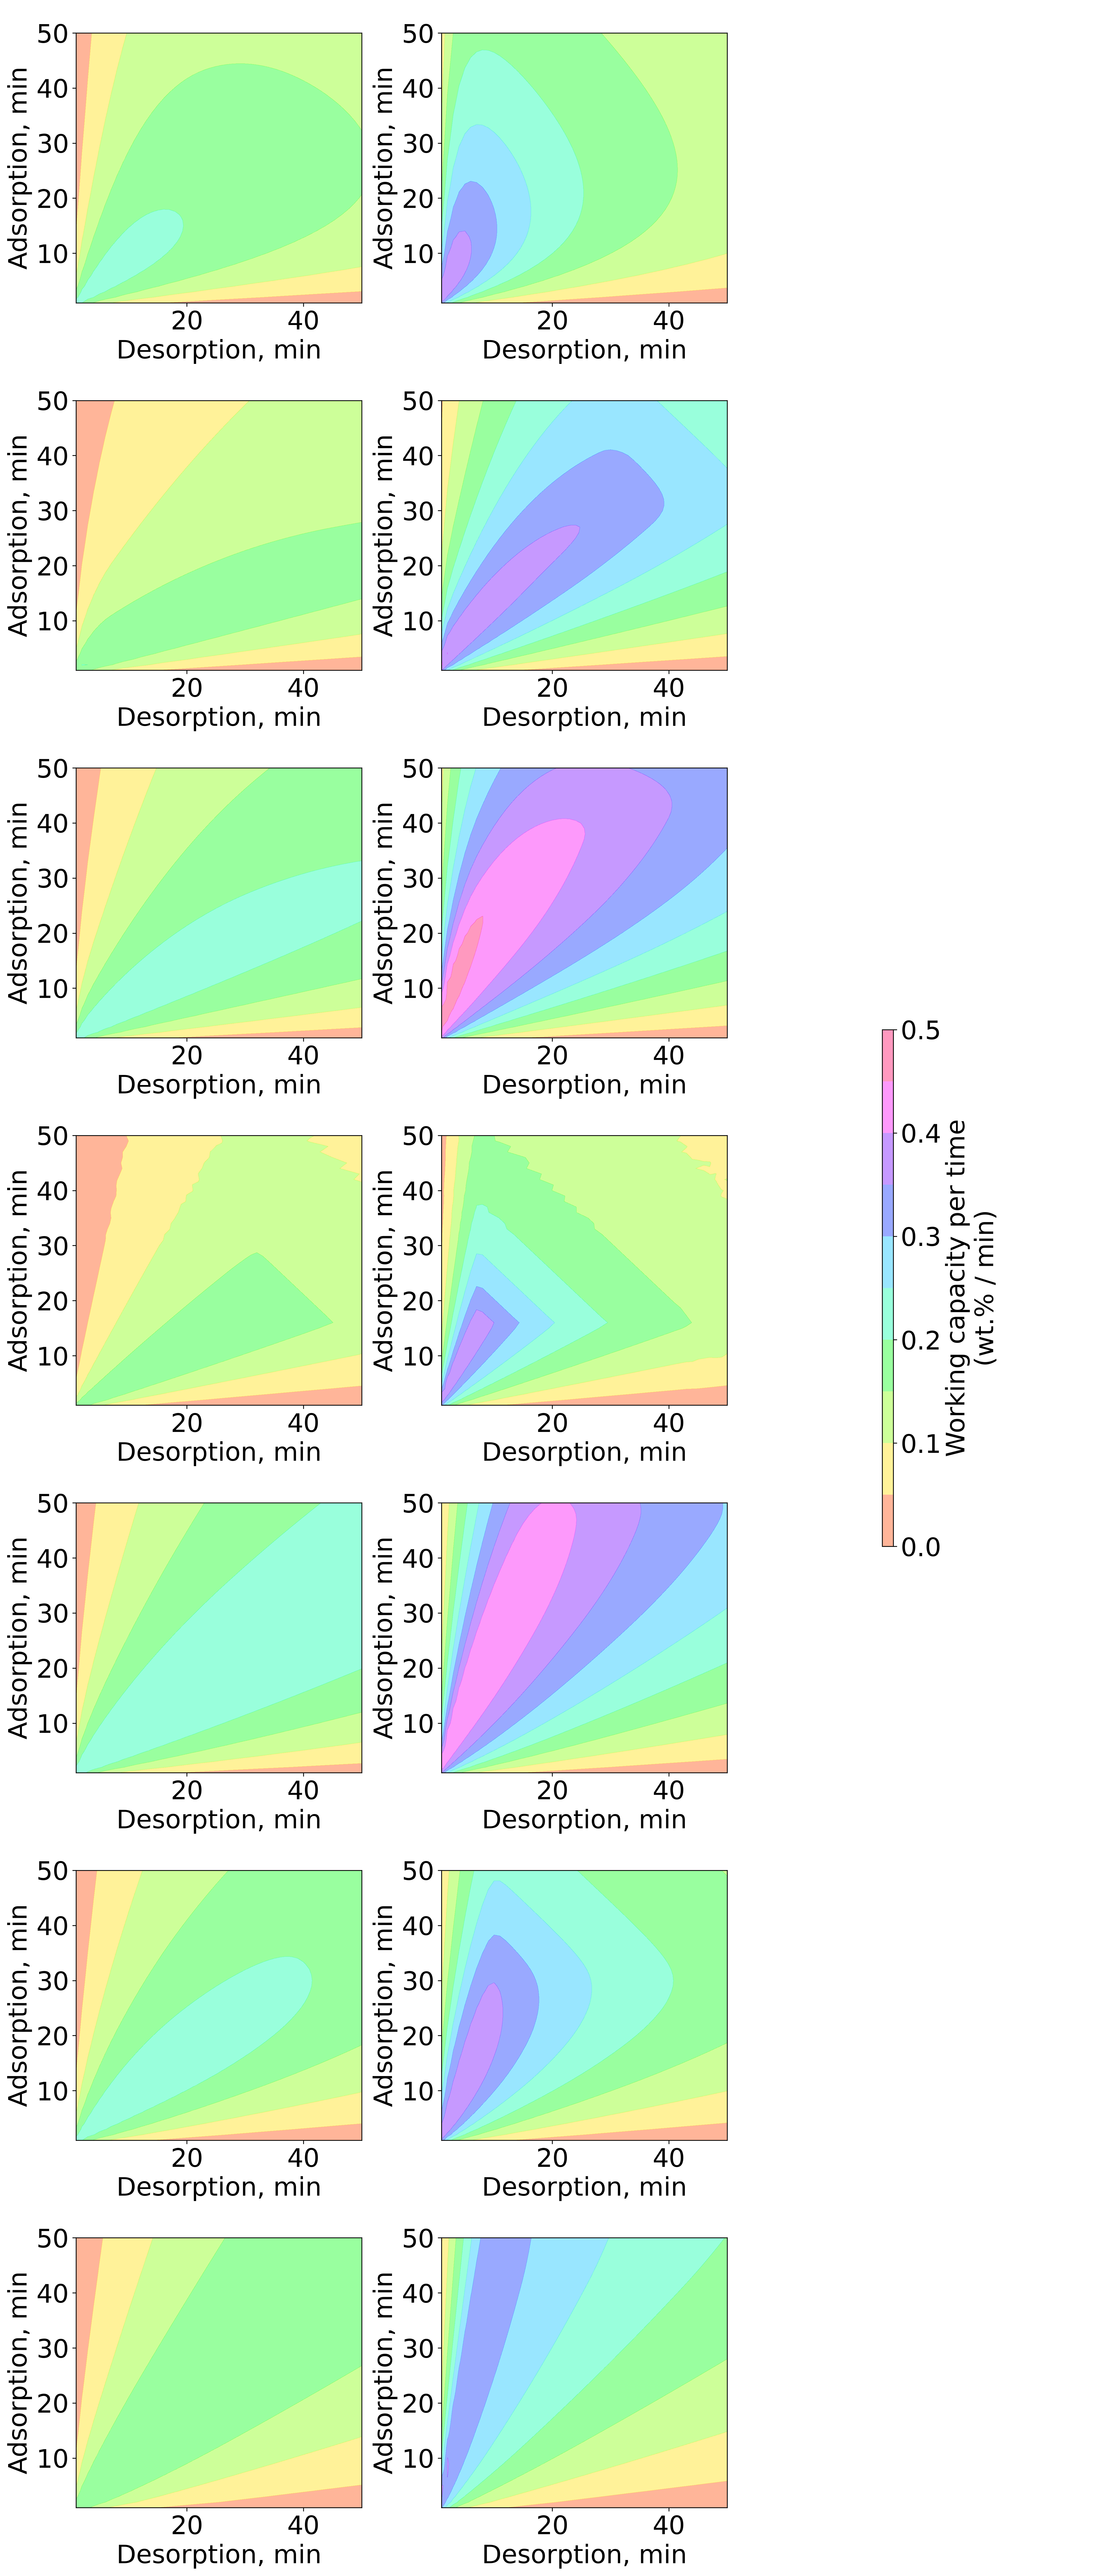

In [8]:
f, axarr = plt.subplots(7, 3, figsize = (3*5, 7*(5)), dpi=300)
max_wc = 0.5

### humidity swing
max_diff = 1
idx = 50
text_size = 25
print(len(heatmap_list))
for i, vert_hm in enumerate(heatmap_list[0][:]):
    cp1 = axarr[i,0].contourf(t_des_range[:idx], t_ads_range[:idx],vert_hm[:idx, :idx] ,
                            #levels=[h*max_wc for h in [0, 0.1, 0.2, 0.3, 0.4 ,0.5, 0.6 ,0.7, 0.8, 0.9, 1.0]],
                            levels=[h*max_wc for h in np.linspace(0, 1, 11)], vmin=0, vmax=max_wc, cmap='hsv', alpha=0.4
                           )
    axarr[i, 0].tick_params(axis='x', labelsize=text_size)
    axarr[ i, 0].tick_params(axis='y', labelsize=text_size)
    axarr[ i, 0].set_xlabel('Desorption, min', fontsize=text_size)
    axarr[ i, 0].set_ylabel('Adsorption, min', fontsize=text_size)
    axarr[ i, 0].set_title(' ', fontsize=text_size)
    axarr[ i, 0].set_ylim([1, idx])
    axarr[ i, 0].set_xlim([1, idx])


### temperature swing
max_diff = 1
idx = 50
text_size = 25
print(len(heatmap_list))
for i, vert_hm in enumerate(heatmap_list[1][:]):
    cp1 = axarr[i, 1].contourf(t_des_range[:idx], t_ads_range[:idx],vert_hm[:idx, :idx] ,
                            #levels=[h*max_wc for h in [0, 0.1, 0.2, 0.3, 0.4 ,0.5, 0.6 ,0.7, 0.8, 0.9, 1.0]],
                            levels=[h*max_wc for h in np.linspace(0, 1, 11)], vmin=0, vmax=max_wc, cmap='hsv', alpha=0.4
                           )
    axarr[i, 1].tick_params(axis='x', labelsize=text_size)
    axarr[ i, 1].tick_params(axis='y', labelsize=text_size)
    axarr[ i, 1].set_xlabel('Desorption, min', fontsize=text_size)
    axarr[ i, 1].set_ylabel('Adsorption, min', fontsize=text_size)
    axarr[ i, 1].set_title(' ', fontsize=text_size)
    axarr[ i, 1].set_ylim([1, idx])
    axarr[ i, 1 ].set_xlim([1, idx])
    axarr[i, 2].axis('off')
cax = plt.axes([0.80, 0.4, 0.01, 0.20])
cbar = plt.colorbar(cp1, cax=cax)
cbar.ax.tick_params(labelsize=text_size)
cbar.set_label('Working capacity per time\n(wt.% / min)', rotation=90, fontsize=text_size)
plt.tight_layout()
plt.savefig('Figure4_Heatmaps_humidity_VS_temperature_30RH.png', dpi=600)
plt.show()

### 30 RH + volumetric

In [9]:
import os

number_of_steps = 100
values = {}
values['min_time'] = 1
values['step'] = 1
t_ads_range = np.linspace(float(values['min_time']), float(values['min_time']) + (number_of_steps)*float(values['step']), num=number_of_steps, endpoint=False)
t_des_range = np.linspace(float(values['min_time']), float(values['min_time']) + (number_of_steps)*float(values['step']), num=number_of_steps, endpoint=False)



path = 'kinetics_fitting/27C/'

filelist = ['Heatmap_Syloid_ads1.0-100.0_des1.0-100.0_n100_30RH.csv',
            'Heatmap_ROS-039_ads1.0-100.0_des1.0-100.0_n100_30RH.csv', 
            'Heatmap_MIL-160_ads1.0-100.0_des1.0-100.0_n100_30RH.csv', 
            'Heatmap_ROS-037_ads1.0-100.0_des1.0-100.0_n100_30RH.csv',
            'Heatmap_MOF-303_ads1.0-100.0_des1.0-100.0_n100_30RH.csv',
            'Heatmap_ROS-040_ads1.0-100.0_des1.0-100.0_n100_30RH.csv', 
            'Heatmap_CAU-10_ads1.0-100.0_des1.0-100.0_n100_30RH.csv',
            ]

heatmap_list = [[], []]

for filename in filelist:
    print(filename)
    working_capacity_per_time_array = np.loadtxt( path + filename,  delimiter=',')
    heatmap_list[0].append(working_capacity_per_time_array)


number_of_steps = 50
values = {}
values['min_time'] = 1
values['step'] = 1
t_ads_range = np.linspace(float(values['min_time']), float(values['min_time']) + (number_of_steps)*float(values['step']), num=number_of_steps, endpoint=False)
t_des_range = np.linspace(float(values['min_time']), float(values['min_time']) + (number_of_steps)*float(values['step']), num=number_of_steps, endpoint=False)


path = 'kinetics_fitting/60C/'

filelist = ['Heatmap_Syloid_ads1.0-50.0_des1.0-50.0_n50_5.4-30RH.csv',
            'Heatmap_ROS-039_ads1.0-50.0_des1.0-50.0_n50_5.4-30RH.csv',
            'Heatmap_MIL-160_ads1.0-50.0_des1.0-50.0_n50_5.4-30RH.csv',
            'Heatmap_ROS-037_ads1.0-50.0_des1.0-50.0_n50_5.4-30RH.csv',
            'Heatmap_MOF-303_ads1.0-50.0_des1.0-50.0_n50_5.4-30RH.csv', 
            'Heatmap_ROS-040_ads1.0-50.0_des1.0-50.0_n50_5.4-30RH.csv',
            'Heatmap_CAU-10_ads1.0-50.0_des1.0-50.0_n50_5.4-30RH.csv', 
            ]


for filename in filelist:
    print(filename)
    working_capacity_per_time_array = np.loadtxt( path + filename,  delimiter=',')
    heatmap_list[1].append(working_capacity_per_time_array)

Heatmap_Syloid_ads1.0-100.0_des1.0-100.0_n100_30RH.csv
Heatmap_ROS-039_ads1.0-100.0_des1.0-100.0_n100_30RH.csv
Heatmap_MIL-160_ads1.0-100.0_des1.0-100.0_n100_30RH.csv
Heatmap_ROS-037_ads1.0-100.0_des1.0-100.0_n100_30RH.csv
Heatmap_MOF-303_ads1.0-100.0_des1.0-100.0_n100_30RH.csv
Heatmap_ROS-040_ads1.0-100.0_des1.0-100.0_n100_30RH.csv
Heatmap_CAU-10_ads1.0-100.0_des1.0-100.0_n100_30RH.csv
Heatmap_Syloid_ads1.0-50.0_des1.0-50.0_n50_5.4-30RH.csv
Heatmap_ROS-039_ads1.0-50.0_des1.0-50.0_n50_5.4-30RH.csv
Heatmap_MIL-160_ads1.0-50.0_des1.0-50.0_n50_5.4-30RH.csv
Heatmap_ROS-037_ads1.0-50.0_des1.0-50.0_n50_5.4-30RH.csv
Heatmap_MOF-303_ads1.0-50.0_des1.0-50.0_n50_5.4-30RH.csv
Heatmap_ROS-040_ads1.0-50.0_des1.0-50.0_n50_5.4-30RH.csv
Heatmap_CAU-10_ads1.0-50.0_des1.0-50.0_n50_5.4-30RH.csv


2


C:\Users\Andrey.Bezrukov\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


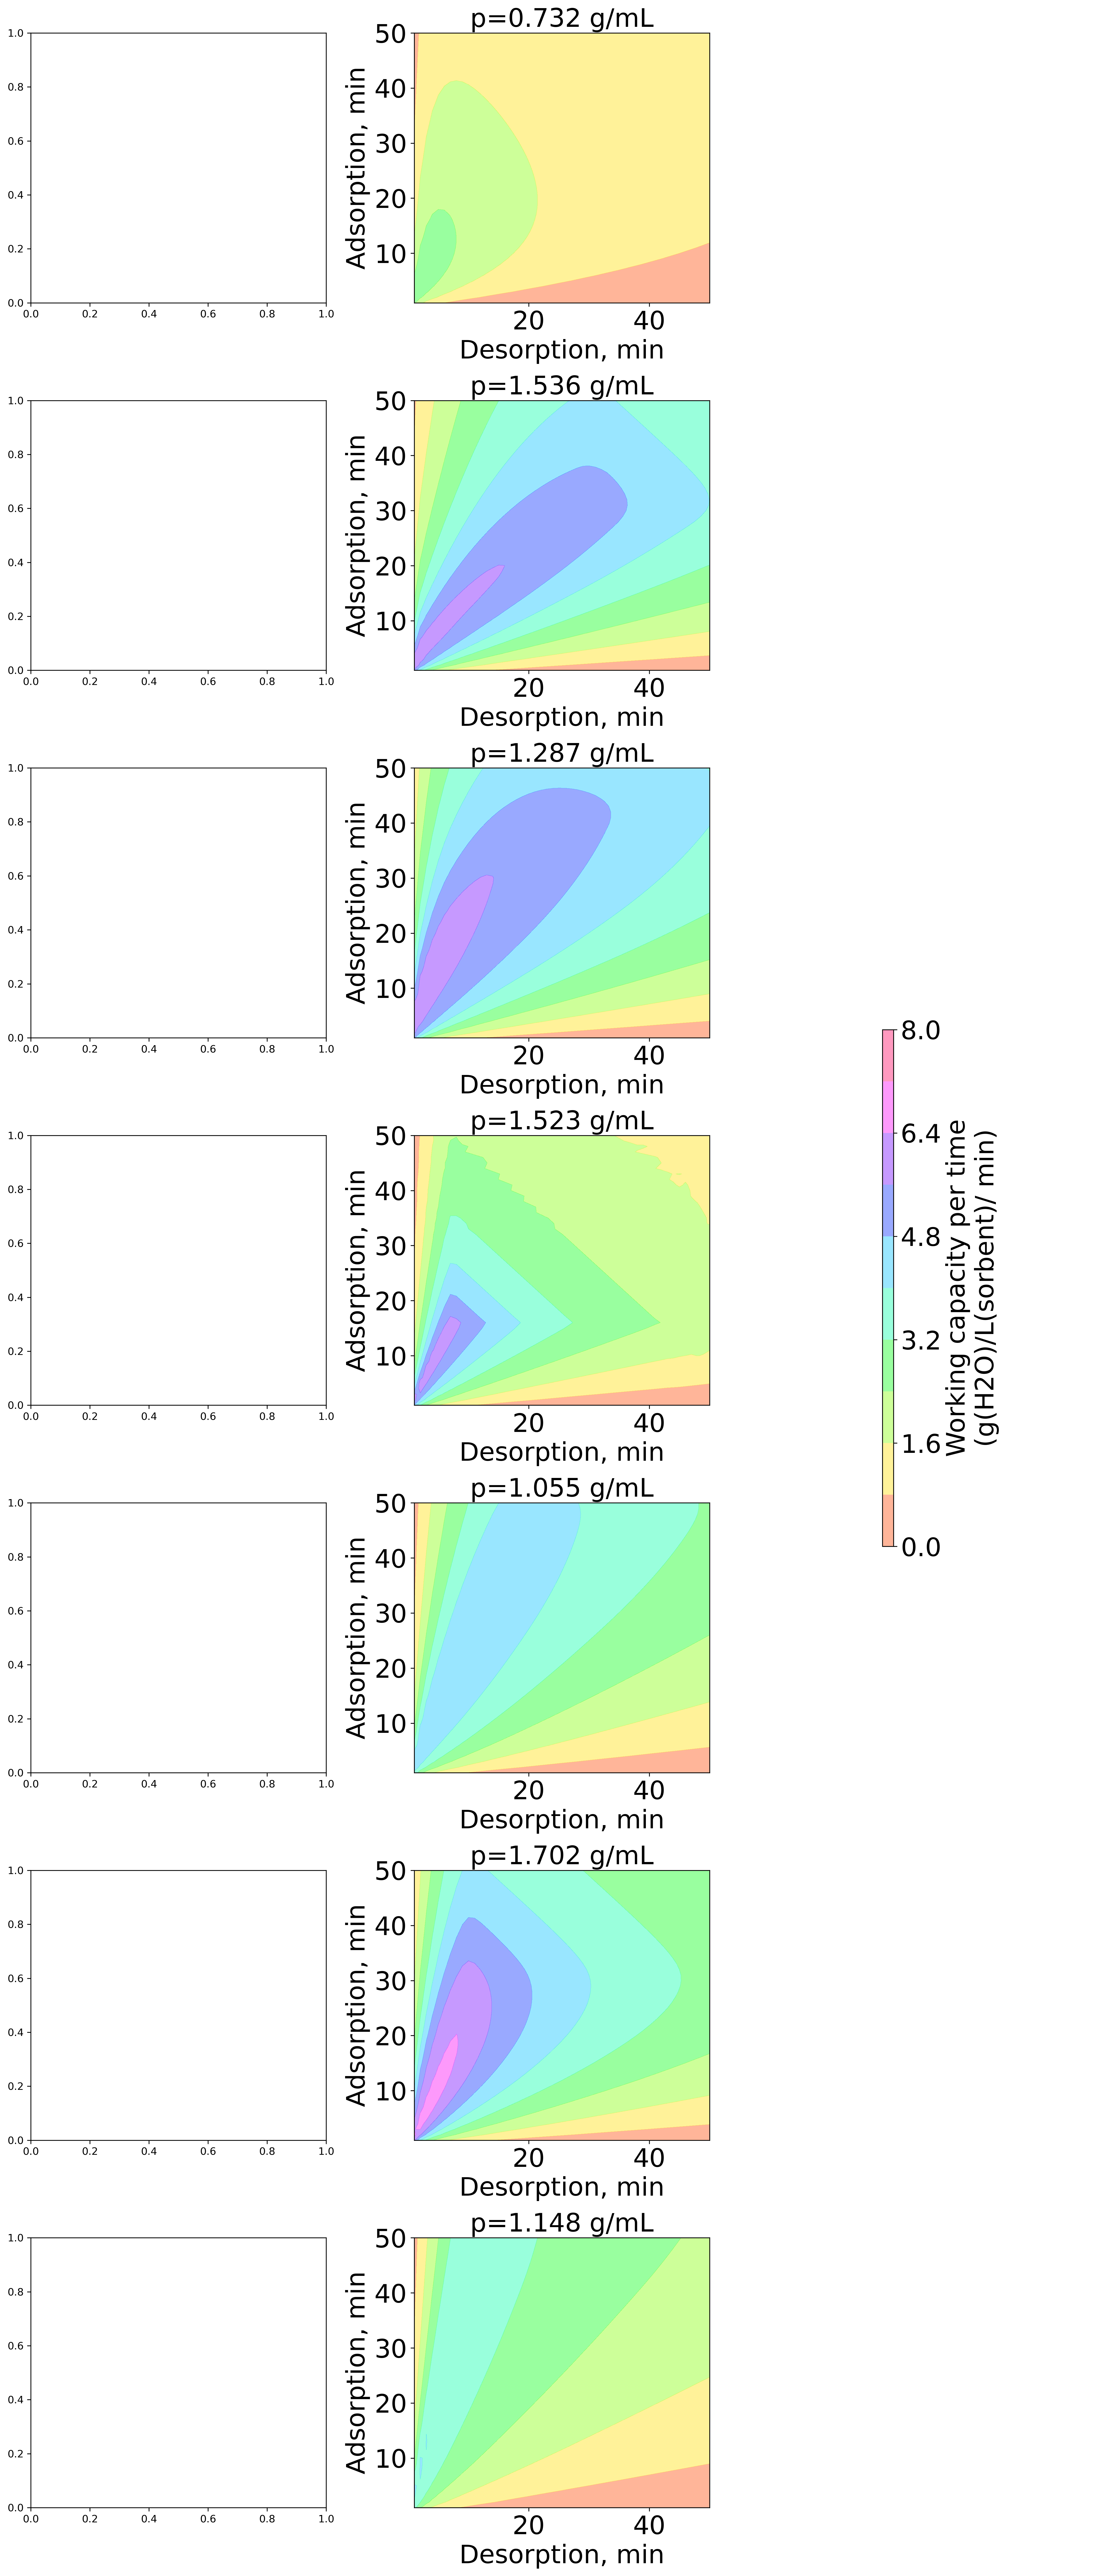

In [10]:
f, axarr = plt.subplots(7, 3, figsize = (3*5, 7*(5)), dpi=300)

max_wc = 8
## temp swing volumetric
density = [0.732, 1.536, 1.287, 1.523, 1.055, 1.702, 1.148]
max_diff = 1
idx = 50
text_size = 25
print(len(heatmap_list))
for i, vert_hm in enumerate(heatmap_list[1][:]):
    cp1 = axarr[i, 1].contourf(t_des_range[:idx], t_ads_range[:idx],vert_hm[:idx, :idx]*density[i]/100*1000 ,
                            #levels=[h*max_wc for h in [0, 0.1, 0.2, 0.3, 0.4 ,0.5, 0.6 ,0.7, 0.8, 0.9, 1.0]],
                            levels=[h*max_wc for h in np.linspace(0, 1, 11)], vmin=0, vmax=max_wc, cmap='hsv', alpha=0.4
                           )
    axarr[i, 1].tick_params(axis='x', labelsize=text_size)
    axarr[ i, 1].tick_params(axis='y', labelsize=text_size)
    axarr[ i, 1].set_xlabel('Desorption, min', fontsize=text_size)
    axarr[ i, 1].set_ylabel('Adsorption, min', fontsize=text_size)
    axarr[ i, 1].set_title('p='+str(density[i])+' g/mL', fontsize=text_size)
    axarr[ i, 1].set_ylim([1, idx])
    axarr[ i, 1 ].set_xlim([1, idx])
    axarr[i, 2].axis('off')
cax = plt.axes([0.80, 0.4, 0.01, 0.20])
cbar = plt.colorbar(cp1, cax=cax)
cbar.ax.tick_params(labelsize=text_size)
cbar.set_label('Working capacity per time\n(g(H2O)/L(sorbent)/ min)', rotation=90, fontsize=text_size)
plt.tight_layout()
plt.savefig('Figure4_Heatmaps_humidity_VS_temperature_30RH_volumetric.png', dpi=600)
plt.show()